# **détection  de pneumonie par CNN _VGG160**



Dans ce projet, on devra former un modèle qui prend en entrée une radiographie pulmonaire et classe l'image entre la normale et la pneumonie.

## Importation des biblio

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import datasets

In [ ]:

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

## Lecture des images

In [ ]:
import cv2
import os
import glob
import gc

# Lire_image permettra de lire les images dans les sous-répertoires

def lire_images(img_dir, xdim, ydim, nmax=5000) :
    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        print(dirname)
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'*g')
        files = glob.glob(data_path)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1)
            img = cv2.resize(img, (xdim,ydim))
            X.append(np.array(img))
            y.append(label)
            n=n+1
        print(n,' images lues')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect()
    return X,y, label, label_names

L'ensemble de données est organisé en 3 dossiers (train, test, val) et contient des sous-dossiers pour chaque catégorie d'image (Pneumonie/Normal). Il existe 5 863 images radiographiques (JPEG) et 2 catégories (Pneumonie/Normal)

In [ ]:
#importation des images (kaggle)
X,y,nlabels,names = lire_images('../input/chest-xray-pneumonia/chest_xray/test', 224, 224, 2000)

PNEUMONIA
390  images lues
NORMAL
234  images lues


In [ ]:
names

['PNEUMONIA', 'NORMAL']

Affichage aléatoire des images

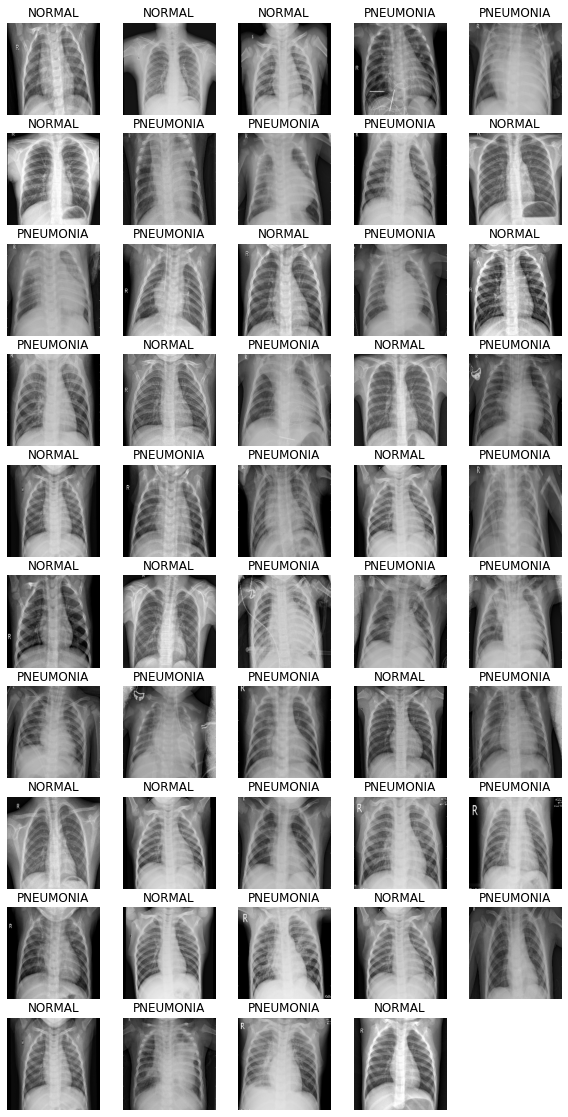

In [ ]:
import random
plt.figure(figsize=(10,20))
for i in range(0,5) :
    plt.subplot(10,5,i+1)
    j = random.randint(0,len(X))
    plt.axis('off')
    plt.imshow(X[j])
    plt.title(names[y[j]])

## Préparation de la data

In [ ]:

y = to_categorical(y)

In [ ]:
X.shape

(624, 224, 224, 3)

In [ ]:
X = X / 255
print(X[0][0])

[[0.61176471 0.61176471 0.61176471]
 [0.63921569 0.63921569 0.63921569]
 [0.65882353 0.65882353 0.65882353]
 [0.69411765 0.69411765 0.69411765]
 [0.69803922 0.69803922 0.69803922]
 [0.71372549 0.71372549 0.71372549]
 [0.7372549  0.7372549  0.7372549 ]
 [0.73333333 0.73333333 0.73333333]
 [0.72941176 0.72941176 0.72941176]
 [0.73333333 0.73333333 0.73333333]
 [0.75686275 0.75686275 0.75686275]
 [0.7372549  0.7372549  0.7372549 ]
 [0.75686275 0.75686275 0.75686275]
 [0.74901961 0.74901961 0.74901961]
 [0.76470588 0.76470588 0.76470588]
 [0.74901961 0.74901961 0.74901961]
 [0.72941176 0.72941176 0.72941176]
 [0.71372549 0.71372549 0.71372549]
 [0.7254902  0.7254902  0.7254902 ]
 [0.67058824 0.67058824 0.67058824]
 [0.64313725 0.64313725 0.64313725]
 [0.6        0.6        0.6       ]
 [0.62352941 0.62352941 0.62352941]
 [0.61176471 0.61176471 0.61176471]
 [0.61176471 0.61176471 0.61176471]
 [0.62352941 0.62352941 0.62352941]
 [0.5372549  0.5372549  0.5372549 ]
 [0.52156863 0.52156863 0.52

In [ ]:
#split data diviser les données en test et train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
del X,y

## Construction du modele

### Modele CNN avec une seul couche convolutionnelle

In [ ]:
# Réseau convolutionnel simple
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(224, 224, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Affichage de la structure du modele

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
flatten (Flatten)            (None, 1548800)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3097602   
Total params: 3,100,034
Trainable params: 3,100,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Apprentissage
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=1)

Epoch 1/20
3/3 [==============================] - 1s 271ms/step - loss: 19.5833 - accuracy: 0.6631 - val_loss: 58.8299 - val_accuracy: 0.4286
Epoch 2/20
3/3 [==============================] - 0s 100ms/step - loss: 41.5299 - accuracy: 0.3690 - val_loss: 8.0401 - val_accuracy: 0.5714
Epoch 3/20
3/3 [==============================] - 0s 114ms/step - loss: 11.9326 - accuracy: 0.6310 - val_loss: 14.5927 - val_accuracy: 0.5714
Epoch 4/20
3/3 [==============================] - 0s 102ms/step - loss: 8.0941 - accuracy: 0.6346 - val_loss: 8.4832 - val_accuracy: 0.4286
Epoch 5/20
3/3 [==============================] - 0s 99ms/step - loss: 5.6188 - accuracy: 0.4581 - val_loss: 4.0691 - val_accuracy: 0.5714
Epoch 6/20
3/3 [==============================] - 0s 123ms/step - loss: 2.0184 - accuracy: 0.7041 - val_loss: 5.0788 - val_accuracy: 0.4286
Epoch 7/20
3/3 [==============================] - 0s 96ms/step - loss: 2.3611 - accuracy: 0.5437 - val_loss: 1.3689 - val_accuracy: 0.6190
Epoch 8/20
3/3 [=

In [ ]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)
print("Score : %.2f%%" % (scores[1]*100))

[0.24288348853588104, 0.920634925365448]
Score : 92.06%


In [ ]:
# Fonction pour afficher graphiquement les scores
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

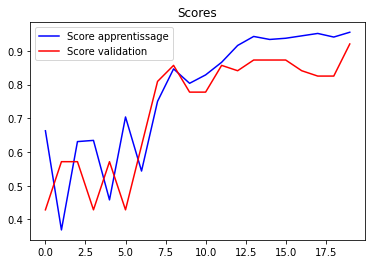

In [ ]:
plot_scores(train)

In [ ]:
# Prediction
y_cnn = model.predict_classes(X_test)

Affichage des fausse predictions, où notre modele s'est trompé

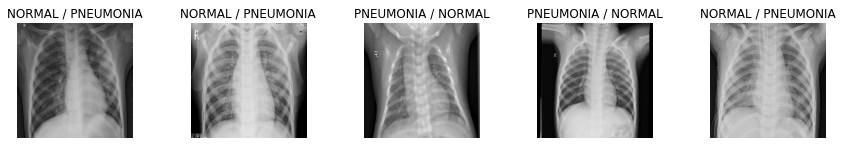

In [ ]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(len(X_test)) :
    if (y_cnn[j] != y_test[j].argmax(axis=-1)) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (names[y_cnn[j]], names[y_test[j].argmax(axis=-1)]))
        i+=1

### Modele CNN plus profond

In [ ]:
# Modèle CNN plus profond
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 20)      5780      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 20)       

In [ ]:
# Apprentissage
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=1)

# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Epoch 1/50
3/3 [==============================] - 1s 354ms/step - loss: 1.5389 - accuracy: 0.5579 - val_loss: 0.7004 - val_accuracy: 0.5714
Epoch 2/50
3/3 [==============================] - 0s 125ms/step - loss: 0.7963 - accuracy: 0.5437 - val_loss: 0.7100 - val_accuracy: 0.4286
Epoch 3/50
3/3 [==============================] - 0s 110ms/step - loss: 0.7714 - accuracy: 0.3886 - val_loss: 0.6816 - val_accuracy: 0.5714
Epoch 4/50
3/3 [==============================] - 0s 121ms/step - loss: 0.6570 - accuracy: 0.6364 - val_loss: 0.7133 - val_accuracy: 0.5714
Epoch 5/50
3/3 [==============================] - 0s 119ms/step - loss: 0.6676 - accuracy: 0.6310 - val_loss: 0.6741 - val_accuracy: 0.5714
Epoch 6/50
3/3 [==============================] - 0s 109ms/step - loss: 0.6350 - accuracy: 0.7112 - val_loss: 0.6676 - val_accuracy: 0.6032
Epoch 7/50
3/3 [==============================] - 0s 120ms/step - loss: 0.6273 - accuracy: 0.7611 - val_loss: 0.6598 - val_accuracy: 0.5714
Epoch 8/50
3/3 [====

In [ ]:
#sauvegarde du modele entrainé
model.save('mnist_cnn2.h5')

In [ ]:
new_model = load_model('mnist_cnn2.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 20)      5780      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 20)       

In [ ]:
scores = new_model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 96.83%


### Transfert learning : Modele VGG16 (Modele prédéfini)

In [ ]:
from keras.applications import VGG16

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg16.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(49, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 49)                1229361   
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1000      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 42        
Total params: 15,945,091
Trainable params: 1,230,403
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=1)

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 1.3372 - accuracy: 0.6542 - val_loss: 1.4958 - val_accuracy: 0.5714
Epoch 2/20
3/3 [==============================] - 1s 284ms/step - loss: 0.8515 - accuracy: 0.6346 - val_loss: 0.6225 - val_accuracy: 0.7778
Epoch 3/20
3/3 [==============================] - 1s 292ms/step - loss: 0.5948 - accuracy: 0.7094 - val_loss: 0.6435 - val_accuracy: 0.5714
Epoch 4/20
3/3 [==============================] - 1s 303ms/step - loss: 0.5392 - accuracy: 0.6667 - val_loss: 0.4389 - val_accuracy: 0.9365
Epoch 5/20
3/3 [==============================] - 1s 293ms/step - loss: 0.4385 - accuracy: 0.9091 - val_loss: 0.3622 - val_accuracy: 0.9683
Epoch 6/20
3/3 [==============================] - 1s 293ms/step - loss: 0.3612 - accuracy: 0.9037 - val_loss: 0.3086 - val_accuracy: 0.9206
Epoch 7/20
3/3 [==============================] - 1s 298ms/step - loss: 0.3154 - accuracy: 0.8930 - val_loss: 0.2544 - val_accuracy: 0.9365
Epoch 8/20
3/3 [=======

In [ ]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 98.41%


In [ ]:
for i in range (len(vgg16.layers)):
    print (i,vgg16.layers[i])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f6ab024b690>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6ab024bb90>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6ab024bc50>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f6ab024f610>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6ab024dcd0>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6ab030bb50>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f6ab0258a50>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6ab025d450>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6ab0263f90>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6ab0267890>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f6ab026ff10>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6ab0275050>
12 <tensorflow.python.ke

In [ ]:
for layer in vgg16.layers[15:]:
    layer.trainable=True
for layer in vgg16.layers[0:15]:
    layer.trainable=False

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(49, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=1)

Epoch 1/20
3/3 [==============================] - 1s 371ms/step - loss: 1.7958 - accuracy: 0.5383 - val_loss: 1.6517 - val_accuracy: 0.5714
Epoch 2/20
3/3 [==============================] - 1s 307ms/step - loss: 0.9783 - accuracy: 0.5508 - val_loss: 0.9421 - val_accuracy: 0.4286
Epoch 3/20
3/3 [==============================] - 1s 292ms/step - loss: 0.7142 - accuracy: 0.5651 - val_loss: 0.6913 - val_accuracy: 0.5714
Epoch 4/20
3/3 [==============================] - 1s 291ms/step - loss: 0.5864 - accuracy: 0.6649 - val_loss: 0.2769 - val_accuracy: 0.9524
Epoch 5/20
3/3 [==============================] - 1s 294ms/step - loss: 0.3644 - accuracy: 0.8520 - val_loss: 0.3680 - val_accuracy: 0.8413
Epoch 6/20
3/3 [==============================] - 1s 304ms/step - loss: 0.3495 - accuracy: 0.8556 - val_loss: 0.2388 - val_accuracy: 0.9524
Epoch 7/20
3/3 [==============================] - 1s 302ms/step - loss: 0.2861 - accuracy: 0.8966 - val_loss: 0.2673 - val_accuracy: 0.8571
Epoch 8/20
3/3 [====

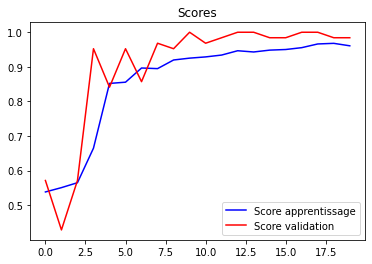

In [ ]:
plot_scores(train)

In [ ]:
y_cnn = model.predict_classes(X_test)

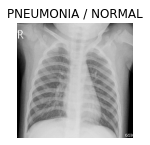

In [ ]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(len(X_test)) :
    if (y_cnn[j] != y_test[j].argmax(axis=-1)) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (names[y_cnn[j]], names[y_test[j].argmax(axis=-1)]))
        i+=1

Parfait on s'est trompé une seul fois c'est tres bien.

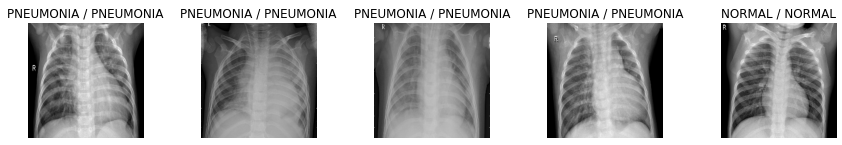

In [ ]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(5) :
    if (y_cnn[j] ==y_test[j].argmax(axis=-1)) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (names[y_cnn[j]], names[y_test[j].argmax(axis=-1)]))
        i+=1